In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import cv2
import os
from glob import glob

In [ ]:
images_path = "/content/drive/MyDrive/Minor Project Final/Images/"
images = glob(images_path+'*.jpg')
len(images)

2116

In [ ]:
images[:4]

['/content/drive/MyDrive/Minor Project Final/Images/2157173498_2eea42ee38.jpg',
 '/content/drive/MyDrive/Minor Project Final/Images/2176980976_7054c99621.jpg',
 '/content/drive/MyDrive/Minor Project Final/Images/2210368267_0615754b48.jpg',
 '/content/drive/MyDrive/Minor Project Final/Images/2187503678_fd743e0a00.jpg']

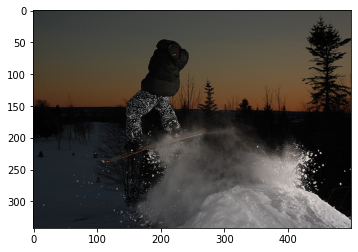

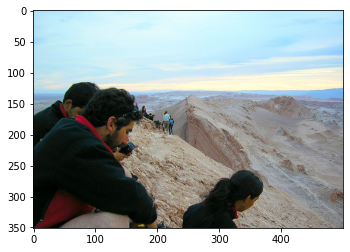

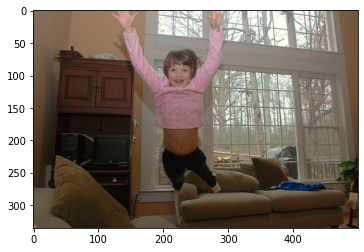

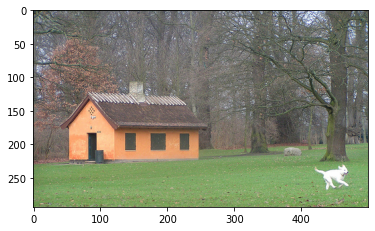

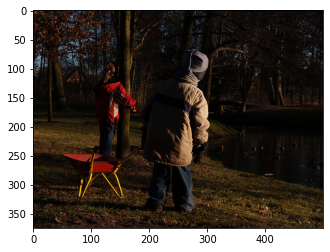

In [ ]:
import matplotlib.pyplot as plt

for i in range(5):
    plt.figure()
    img = cv2.imread(images[i])
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img)

In [ ]:
from keras.applications import ResNet50

incept_model = ResNet50(include_top=True)

102973440/102967424 [==============================] - 1s 0us/step


In [ ]:
incept_model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
___________________________________________________________________________________________

In [ ]:
from keras.models import Model
last = incept_model.layers[-2].output
modele = Model(inputs = incept_model.input,outputs = last)
modele.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
______________________________________________________________________________________________

In [ ]:
images_features = {}
count = 0
for i in images:
    img = cv2.imread(i)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (224,224))
    
    img = img.reshape(1,224,224,3)
    pred = modele.predict(img).reshape(2048,)
        
    img_name = i.split('/')[-1]
    
    images_features[img_name] = pred
    
    count += 1
    
    if count > 1599:
        break
        
    elif count % 50 == 0:
        print(count)

50
100
150
200
250
300
350
400
450
500
550
600
650
700
750
800
850
900
950
1000
1050
1100
1150
1200
1250
1300
1350
1400
1450
1500
1550


In [ ]:
images_features

{'2157173498_2eea42ee38.jpg': array([0.873482  , 0.4586279 , 0.05826771, ..., 2.411851  , 0.17336945,
        0.14624944], dtype=float32),
 '2176980976_7054c99621.jpg': array([0.24771492, 0.2366138 , 0.7590832 , ..., 0.44197595, 0.07364174,
        0.        ], dtype=float32),
 '2210368267_0615754b48.jpg': array([1.415884  , 0.53568864, 0.2161105 , ..., 1.8283666 , 0.08797194,
        0.45341808], dtype=float32),
 '2187503678_fd743e0a00.jpg': array([0.7121778 , 0.52595264, 0.        , ..., 0.766122  , 0.01688369,
        0.08055829], dtype=float32),
 '2201978994_c444e64810.jpg': array([0.93804294, 0.49102584, 0.21598181, ..., 2.4928665 , 1.3509482 ,
        1.4836975 ], dtype=float32),
 '2205328215_3ffc094cde.jpg': array([1.0722603 , 0.75235057, 0.7991303 , ..., 0.22457239, 0.        ,
        0.        ], dtype=float32),
 '219301555_17883a51bd.jpg': array([0.16640794, 2.22517   , 0.        , ..., 0.73676276, 0.501245  ,
        0.07175372], dtype=float32),
 '2142232919_c857a09dd7.jpg'

In [ ]:
caption_path = '/content/drive/MyDrive/Minor Project Final/Flickr8k.token.txt'

In [ ]:
captions = open(caption_path, 'rb').read().decode('utf-8').split('\n')

In [ ]:
len(captions)

40461

In [ ]:
captions_dict = {}
for i in captions:
    try:
        img_name = i.split('\t')[0][:-2] 
        caption = i.split('\t')[1]
        if img_name in images_features:
            if img_name not in captions_dict:
                captions_dict[img_name] = [caption]
                
            else:
                captions_dict[img_name].append(caption)
            
    except:
        pass

In [ ]:
captions_dict

{'1089755335_0bfbfd30e6.jpg': ['A mother and children is fishing on a boardwalk at night .',
  'A woman and three children stand on a deck with a fishing pole .',
  'A woman stands with children on a boardwalk at night overlooking the sea .',
  'Some people on a pier at night with one girl fishing off it .',
  'Woman with three children fishing over boardwalk in the evening .'],
 '109260216_85b0be5378.jpg': ['A person climbing down a sheer rock cliff using a rope',
  'A person climbs a tall , flat mountain while holding onto a safety rope .',
  'A person is climbing a rock while holding onto a white rope .',
  'A person rappels down a steep incline .',
  'A person wearing a red vest climbs up a steep rock .'],
 '109260218_fca831f933.jpg': ['People stand inside a rock dome .',
  'Shaft of light in a cave shows three spelunkers',
  'Spelunkers pose inside a rock cavern while bathed in sunlight from the surface .',
  'three people sit in a cave .',
  'Three rock climbers are posing on big

In [ ]:
len(captions_dict)

1600

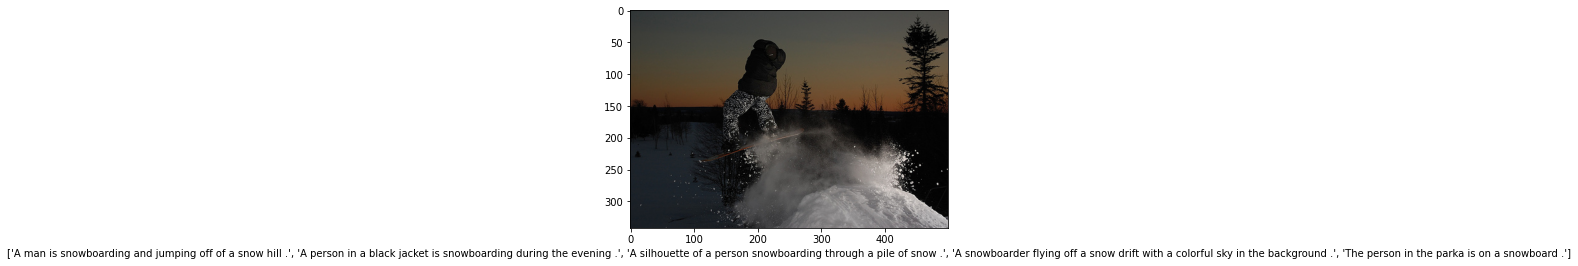

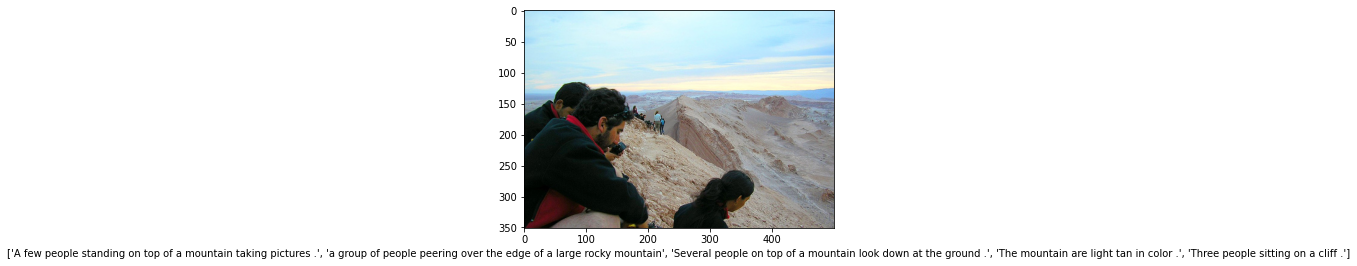

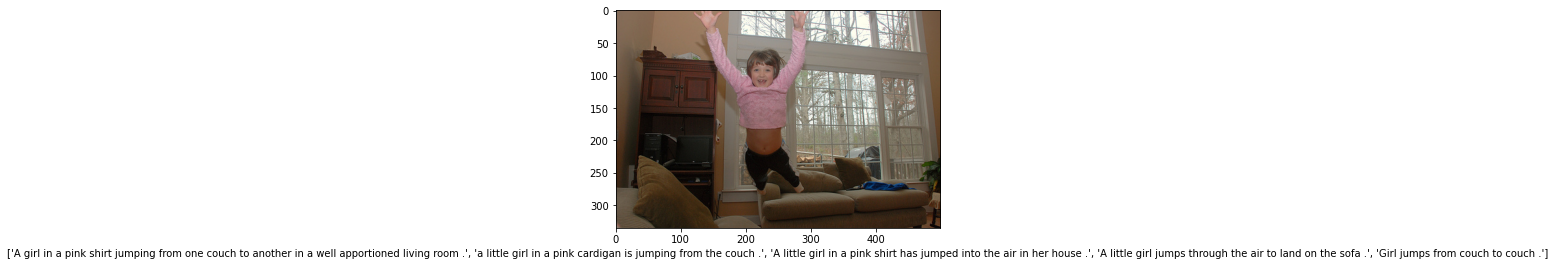

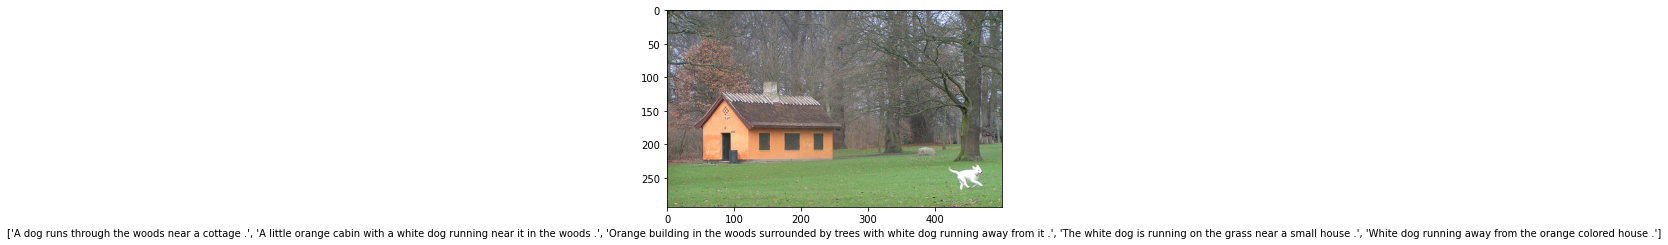

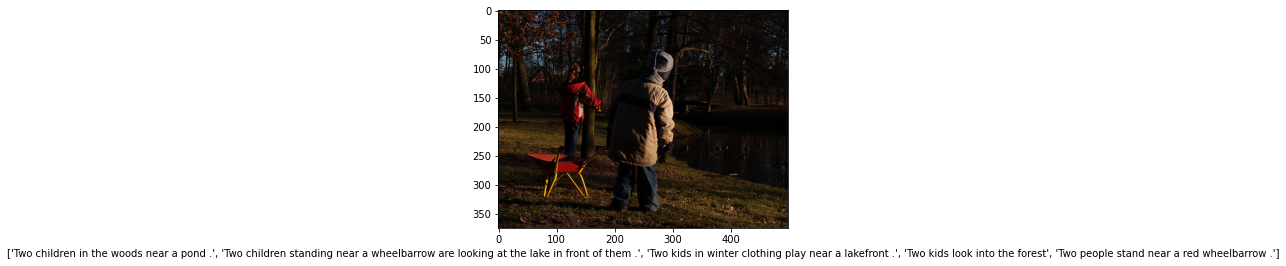

In [ ]:
import matplotlib.pyplot as plt

for i in range(5):
    plt.figure()
    img_name = images[i]
    
    
    img = cv2.imread(img_name)
    
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.xlabel(captions_dict[img_name.split('/')[-1]])
    plt.imshow(img)

In [ ]:
def preprocessed(txt):
    modified = txt.lower()
    modified = 'startofseq ' + modified + ' endofseq'
    return modified

In [ ]:
for k,v in captions_dict.items():
    for vv in v:
        captions_dict[k][v.index(vv)] = preprocessed(vv)

In [ ]:
captions_dict

{'1089755335_0bfbfd30e6.jpg': ['startofseq a mother and children is fishing on a boardwalk at night . endofseq',
  'startofseq a woman and three children stand on a deck with a fishing pole . endofseq',
  'startofseq a woman stands with children on a boardwalk at night overlooking the sea . endofseq',
  'startofseq some people on a pier at night with one girl fishing off it . endofseq',
  'startofseq woman with three children fishing over boardwalk in the evening . endofseq'],
 '109260216_85b0be5378.jpg': ['startofseq a person climbing down a sheer rock cliff using a rope endofseq',
  'startofseq a person climbs a tall , flat mountain while holding onto a safety rope . endofseq',
  'startofseq a person is climbing a rock while holding onto a white rope . endofseq',
  'startofseq a person rappels down a steep incline . endofseq',
  'startofseq a person wearing a red vest climbs up a steep rock . endofseq'],
 '109260218_fca831f933.jpg': ['startofseq people stand inside a rock dome . endo

Removing punctuations and single letter words from captions


In [ ]:
import string
#preparing translator for removing punctuations
translator = str.maketrans('', '', string.punctuation)
for key, description_list in captions_dict.items():
    for i in range(len(description_list)):
        desc = description_list[i]
        # tokenizing
        desc = desc.split()
        # converting  to lower case 
        desc = [word.lower() for word in desc]
        # removing punctuation from each token
        desc = [w.translate(translator) for w in desc]
        # removing 's' and 'a' and other single chracters
        desc = [word for word in desc if len(word)>1]
        # removing tokens with numbers in them
        desc = [word for word in desc if word.isalpha()]
        # store as string
        description_list[i] =  ' '.join(desc)

In [ ]:
captions_dict

{'1089755335_0bfbfd30e6.jpg': ['startofseq mother and children is fishing on boardwalk at night endofseq',
  'startofseq woman and three children stand on deck with fishing pole endofseq',
  'startofseq woman stands with children on boardwalk at night overlooking the sea endofseq',
  'startofseq some people on pier at night with one girl fishing off it endofseq',
  'startofseq woman with three children fishing over boardwalk in the evening endofseq'],
 '109260216_85b0be5378.jpg': ['startofseq person climbing down sheer rock cliff using rope endofseq',
  'startofseq person climbs tall flat mountain while holding onto safety rope endofseq',
  'startofseq person is climbing rock while holding onto white rope endofseq',
  'startofseq person rappels down steep incline endofseq',
  'startofseq person wearing red vest climbs up steep rock endofseq'],
 '109260218_fca831f933.jpg': ['startofseq people stand inside rock dome endofseq',
  'startofseq shaft of light in cave shows three spelunkers e

In [ ]:
count_words = {}
for k,vv in captions_dict.items():
    for v in vv:
        for word in v.split():
            if len(word)<=1:
                continue
            elif word not in count_words:

                count_words[word] = 0

            else:
                count_words[word] += 1

In [ ]:
count_words

{'startofseq': 7999,
 'mother': 6,
 'and': 1816,
 'children': 247,
 'is': 1932,
 'fishing': 45,
 'on': 2075,
 'boardwalk': 4,
 'at': 600,
 'night': 16,
 'endofseq': 7999,
 'woman': 584,
 'three': 278,
 'stand': 80,
 'deck': 7,
 'with': 1591,
 'pole': 40,
 'stands': 194,
 'overlooking': 18,
 'the': 3725,
 'sea': 7,
 'some': 118,
 'people': 465,
 'pier': 16,
 'one': 206,
 'girl': 747,
 'off': 107,
 'it': 74,
 'over': 233,
 'in': 3705,
 'evening': 1,
 'person': 249,
 'climbing': 138,
 'down': 396,
 'sheer': 4,
 'rock': 205,
 'cliff': 55,
 'using': 17,
 'rope': 71,
 'climbs': 49,
 'tall': 36,
 'flat': 3,
 'mountain': 79,
 'while': 370,
 'holding': 260,
 'onto': 41,
 'safety': 10,
 'white': 762,
 'rappels': 0,
 'steep': 15,
 'incline': 3,
 'wearing': 658,
 'red': 607,
 'vest': 25,
 'up': 262,
 'inside': 39,
 'dome': 1,
 'shaft': 0,
 'of': 1265,
 'light': 37,
 'cave': 6,
 'shows': 3,
 'spelunkers': 1,
 'pose': 22,
 'cavern': 0,
 'bathed': 0,
 'sunlight': 1,
 'from': 191,
 'surface': 7,
 'sit

In [ ]:
len(count_words)

3997

In [ ]:
THRESH = -1
count = 1
new_dict = {}
for k,v in count_words.items():
    if count_words[k] > THRESH:
        new_dict[k] = count
        count += 1

In [ ]:
new_dict

{'startofseq': 1,
 'mother': 2,
 'and': 3,
 'children': 4,
 'is': 5,
 'fishing': 6,
 'on': 7,
 'boardwalk': 8,
 'at': 9,
 'night': 10,
 'endofseq': 11,
 'woman': 12,
 'three': 13,
 'stand': 14,
 'deck': 15,
 'with': 16,
 'pole': 17,
 'stands': 18,
 'overlooking': 19,
 'the': 20,
 'sea': 21,
 'some': 22,
 'people': 23,
 'pier': 24,
 'one': 25,
 'girl': 26,
 'off': 27,
 'it': 28,
 'over': 29,
 'in': 30,
 'evening': 31,
 'person': 32,
 'climbing': 33,
 'down': 34,
 'sheer': 35,
 'rock': 36,
 'cliff': 37,
 'using': 38,
 'rope': 39,
 'climbs': 40,
 'tall': 41,
 'flat': 42,
 'mountain': 43,
 'while': 44,
 'holding': 45,
 'onto': 46,
 'safety': 47,
 'white': 48,
 'rappels': 49,
 'steep': 50,
 'incline': 51,
 'wearing': 52,
 'red': 53,
 'vest': 54,
 'up': 55,
 'inside': 56,
 'dome': 57,
 'shaft': 58,
 'of': 59,
 'light': 60,
 'cave': 61,
 'shows': 62,
 'spelunkers': 63,
 'pose': 64,
 'cavern': 65,
 'bathed': 66,
 'sunlight': 67,
 'from': 68,
 'surface': 69,
 'sit': 70,
 'climbers': 71,
 'are':

In [ ]:
len(new_dict)

3997

In [ ]:
new_dict['<OUT>'] = len(new_dict)

In [ ]:
captions_backup = captions_dict.copy()

In [ ]:
captions_dict = captions_backup.copy()

In [ ]:
for k, vv in captions_dict.items():
    for v in vv:
        encoded = []
        for word in v.split():  
            if word not in new_dict:
                encoded.append(new_dict['<OUT>'])
            else:
                encoded.append(new_dict[word])


        captions_dict[k][vv.index(v)] = encoded

In [ ]:
captions_dict

{'1089755335_0bfbfd30e6.jpg': [[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
  [1, 12, 3, 13, 4, 14, 7, 15, 16, 6, 17, 11],
  [1, 12, 18, 16, 4, 7, 8, 9, 10, 19, 20, 21, 11],
  [1, 22, 23, 7, 24, 9, 10, 16, 25, 26, 6, 27, 28, 11],
  [1, 12, 16, 13, 4, 6, 29, 8, 30, 20, 31, 11]],
 '109260216_85b0be5378.jpg': [[1, 32, 33, 34, 35, 36, 37, 38, 39, 11],
  [1, 32, 40, 41, 42, 43, 44, 45, 46, 47, 39, 11],
  [1, 32, 5, 33, 36, 44, 45, 46, 48, 39, 11],
  [1, 32, 49, 34, 50, 51, 11],
  [1, 32, 52, 53, 54, 40, 55, 50, 36, 11]],
 '109260218_fca831f933.jpg': [[1, 23, 14, 56, 36, 57, 11],
  [1, 58, 59, 60, 30, 61, 62, 13, 63, 11],
  [1, 63, 64, 56, 36, 65, 44, 66, 30, 67, 68, 20, 69, 11],
  [1, 13, 23, 70, 30, 61, 11],
  [1, 13, 36, 71, 72, 73, 7, 74, 75, 11]],
 '1095476286_87d4f8664e.jpg': [[1, 76, 77, 30, 78, 11],
  [1, 76, 79, 30, 20, 80, 11],
  [1, 81, 79, 30, 78, 11],
  [1, 82, 76, 83, 30, 20, 84, 11],
  [1, 85, 76, 5, 77, 86, 84, 87, 88, 55, 68, 20, 89, 11]],
 '1096395242_fc69f0ae5a.jpg': [[1, 76, 16, 

In [ ]:
from keras.utils import to_categorical
from keras.preprocessing.sequence import pad_sequences

In [ ]:
MAX_LEN = 0
for k, vv in captions_dict.items():
    for v in vv:
        if len(v) > MAX_LEN:
            MAX_LEN = len(v)
            print(v)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
[1, 12, 3, 13, 4, 14, 7, 15, 16, 6, 17, 11]
[1, 12, 18, 16, 4, 7, 8, 9, 10, 19, 20, 21, 11]
[1, 22, 23, 7, 24, 9, 10, 16, 25, 26, 6, 27, 28, 11]
[1, 85, 76, 16, 94, 95, 96, 97, 90, 9, 20, 98, 30, 99, 59, 100, 11]
[1, 32, 127, 30, 128, 129, 116, 130, 29, 131, 132, 30, 99, 59, 122, 133, 123, 11]
[1, 76, 30, 53, 146, 272, 5, 45, 94, 273, 30, 94, 188, 274, 275, 133, 59, 271, 11]
[1, 115, 30, 53, 137, 3, 276, 5, 453, 34, 454, 122, 231, 7, 455, 16, 456, 457, 458, 11]
[1, 115, 30, 183, 137, 3, 517, 148, 297, 12, 30, 183, 588, 3, 589, 137, 30, 99, 59, 587, 14, 16, 543, 108, 181, 11]
[1, 26, 30, 53, 3, 183, 1058, 16, 48, 767, 5, 105, 317, 193, 115, 30, 432, 3, 26, 30, 1059, 300, 3, 183, 3, 48, 1060, 611, 11]
[1, 12, 30, 119, 92, 645, 3, 517, 5, 1000, 7, 36, 165, 44, 510, 12, 30, 53, 129, 18, 317, 193, 195, 7, 20, 165, 1676, 195, 1013, 1014, 11]
[1, 119, 958, 115, 52, 285, 667, 3, 107, 54, 5, 45, 55, 3355, 3357, 30, 99, 59, 94, 474, 44, 105, 7, 498, 499, 30, 9

In [ ]:
MAX_LEN

34

In [ ]:
captions_dict

{'1089755335_0bfbfd30e6.jpg': [[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
  [1, 12, 3, 13, 4, 14, 7, 15, 16, 6, 17, 11],
  [1, 12, 18, 16, 4, 7, 8, 9, 10, 19, 20, 21, 11],
  [1, 22, 23, 7, 24, 9, 10, 16, 25, 26, 6, 27, 28, 11],
  [1, 12, 16, 13, 4, 6, 29, 8, 30, 20, 31, 11]],
 '109260216_85b0be5378.jpg': [[1, 32, 33, 34, 35, 36, 37, 38, 39, 11],
  [1, 32, 40, 41, 42, 43, 44, 45, 46, 47, 39, 11],
  [1, 32, 5, 33, 36, 44, 45, 46, 48, 39, 11],
  [1, 32, 49, 34, 50, 51, 11],
  [1, 32, 52, 53, 54, 40, 55, 50, 36, 11]],
 '109260218_fca831f933.jpg': [[1, 23, 14, 56, 36, 57, 11],
  [1, 58, 59, 60, 30, 61, 62, 13, 63, 11],
  [1, 63, 64, 56, 36, 65, 44, 66, 30, 67, 68, 20, 69, 11],
  [1, 13, 23, 70, 30, 61, 11],
  [1, 13, 36, 71, 72, 73, 7, 74, 75, 11]],
 '1095476286_87d4f8664e.jpg': [[1, 76, 77, 30, 78, 11],
  [1, 76, 79, 30, 20, 80, 11],
  [1, 81, 79, 30, 78, 11],
  [1, 82, 76, 83, 30, 20, 84, 11],
  [1, 85, 76, 5, 77, 86, 84, 87, 88, 55, 68, 20, 89, 11]],
 '1096395242_fc69f0ae5a.jpg': [[1, 76, 16, 

In [ ]:
VOCAB_SIZE = len(new_dict)

def generator(photo, caption):
    n_samples = 0
    
    X = []
    y_in = []
    y_out = []
    
    for k, vv in caption.items():
        for v in vv:
            for i in range(1, len(v)):
                X.append(photo[k])

                in_seq= [v[:i]]
                out_seq = v[i]

                in_seq = pad_sequences(in_seq, maxlen=MAX_LEN, padding='post', truncating='post')[0]
                out_seq = to_categorical([out_seq], num_classes=VOCAB_SIZE)[0]

                y_in.append(in_seq)
                y_out.append(out_seq)
            
    return X, y_in, y_out

In [ ]:
X, y_in, y_out = generator(images_features, captions_dict)

In [ ]:
len(X), len(y_in), len(y_out)

(82165, 82165, 82165)

In [ ]:
X = np.array(X)
y_in = np.array(y_in, dtype='float64')
y_out = np.array(y_out, dtype='float64')

In [ ]:
X.shape, y_in.shape, y_out.shape

((82165, 2048), (82165, 34), (82165, 3998))

In [ ]:
X[1510]

array([1.4012802, 1.0486898, 0.494416 , ..., 1.9036855, 0.       ,
       0.       ], dtype=float32)

In [ ]:
y_in[2]

array([1., 2., 3., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [ ]:
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
from keras.utils import plot_model
from keras.models import Model, Sequential
from keras.layers import Input
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Embedding
from keras.layers import Dropout
from keras.layers.merge import add
from keras.callbacks import ModelCheckpoint
from keras.layers import Dense, Flatten,Input, Convolution2D, Dropout, LSTM, TimeDistributed, Embedding, Bidirectional, Activation, RepeatVector,Concatenate
from keras.models import Sequential, Model

In [ ]:
embedding_size = 128
max_len = MAX_LEN
vocab_size = len(new_dict)

image_model = Sequential()

image_model.add(Dense(embedding_size, input_shape=(2048,), activation='relu'))
image_model.add(RepeatVector(max_len))

image_model.summary()

language_model = Sequential()

language_model.add(Embedding(input_dim=vocab_size, output_dim=embedding_size, input_length=max_len))
language_model.add(LSTM(256, return_sequences=True))
language_model.add(TimeDistributed(Dense(embedding_size)))

language_model.summary()

conca = Concatenate()([image_model.output, language_model.output])
x = LSTM(128, return_sequences=True)(conca)
x = LSTM(512, return_sequences=False)(x)
x = Dense(vocab_size)(x)
out = Activation('softmax')(x)
model = Model(inputs=[image_model.input, language_model.input], outputs = out)

# model.load_weights("../input/model_weights.h5")
model.compile(loss='categorical_crossentropy', optimizer='RMSprop', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               262272    
_________________________________________________________________
repeat_vector (RepeatVector) (None, 34, 128)           0         
Total params: 262,272
Trainable params: 262,272
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 34, 128)           511744    
_________________________________________________________________
lstm (LSTM)                  (None, 34, 256)           394240    
_________________________________________________________________
time_distributed (TimeDistri (None, 34, 128)           32896     
Total params: 938,880
Traina

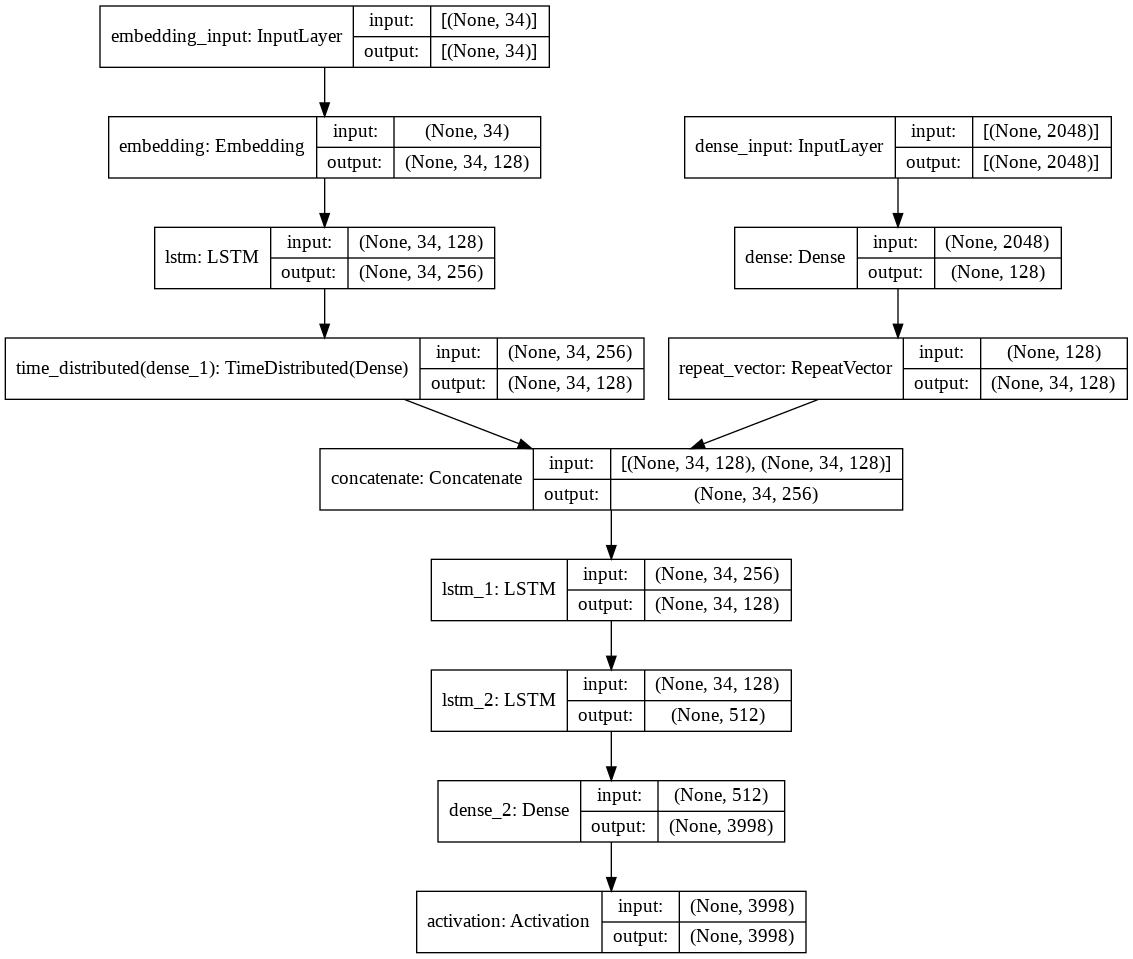

In [ ]:
from keras.utils import plot_model
plot_model(model,show_shapes=True)

In [ ]:
model.fit([X, y_in], y_out, batch_size=512, epochs=10)

Epoch 1/10
161/161 [==============================] - 583s 4s/step - loss: 3.9880 - accuracy: 0.2299
Epoch 2/10
161/161 [==============================] - 583s 4s/step - loss: 3.8583 - accuracy: 0.2448
Epoch 3/10
161/161 [==============================] - 586s 4s/step - loss: 3.7199 - accuracy: 0.2590
Epoch 4/10
161/161 [==============================] - 589s 4s/step - loss: 3.5793 - accuracy: 0.2762
Epoch 5/10
161/161 [==============================] - 589s 4s/step - loss: 3.4654 - accuracy: 0.2935
Epoch 6/10
161/161 [==============================] - 586s 4s/step - loss: 3.3457 - accuracy: 0.3121
Epoch 7/10
161/161 [==============================] - 590s 4s/step - loss: 3.2397 - accuracy: 0.3254
Epoch 8/10
161/161 [==============================] - 591s 4s/step - loss: 3.1461 - accuracy: 0.3365
Epoch 9/10
161/161 [==============================] - 579s 4s/step - loss: 3.0527 - accuracy: 0.3500
Epoch 10/10
161/161 [==============================] - 573s 4s/step - loss: 2.9671 - accura

In [ ]:
inv_dict = {v:k for k, v in new_dict.items()}

In [ ]:
model.save('model.h5')

In [ ]:
model.save_weights('mine_model_weights.h5')

In [ ]:
np.save('vocab.npy', new_dict)

In [ ]:
def getImage(x):
    
    test_img_path = images[x]

    test_img = cv2.imread(test_img_path)
    test_img = cv2.cvtColor(test_img, cv2.COLOR_BGR2RGB)

    test_img = cv2.resize(test_img, (224,224))

    test_img = np.reshape(test_img, (1,224,224,3))
    
    return test_img

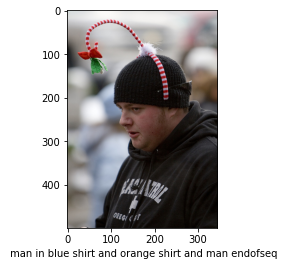

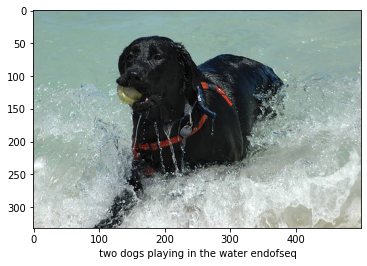

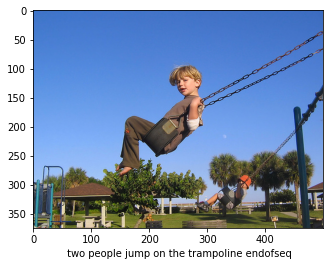

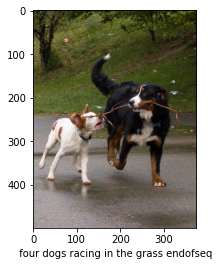

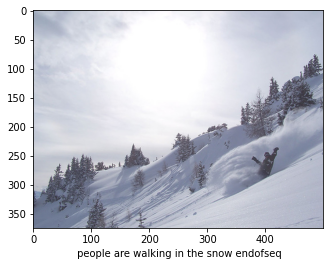

In [ ]:
for i in range(5):
    
    no = np.random.randint(1600,2000,(1,1))[0,0]
    test_feature = modele.predict(getImage(no)).reshape(1,2048)
    
    test_img_path = images[no]
    test_img = cv2.imread(test_img_path)
    test_img = cv2.cvtColor(test_img, cv2.COLOR_BGR2RGB)


    text_inp = ['startofseq']

    count = 0
    caption = ''
    while count < 34:
        count += 1

        encoded = []
        for i in text_inp:
            encoded.append(new_dict[i])

        encoded = [encoded]

        encoded = pad_sequences(encoded, padding='post', truncating='post', maxlen=MAX_LEN)


        prediction = np.argmax(model.predict([test_feature, encoded]))

        sampled_word = inv_dict[prediction]

        caption = caption + ' ' + sampled_word
            
        if sampled_word == 'endofseq':
            break

        text_inp.append(sampled_word)
        
    plt.figure()
    plt.imshow(test_img)
    plt.xlabel(caption)